# Electricity Price Explanation EDA : Ensemble Learning Project

This notebook details EDA for the dataset
Group Members: Abhimanyu Bhadauria, Aditi Agrawal, Saptarshi Banerjee, Shubham Bhandari

## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


## Loading data

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods. 

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated wwith a day and a country. 

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload. 

- **Some columns have missing values**.


In [2]:
# Load the datasets
x_train = pd.read_csv('/Users/aditi/Documents/Term 2/Ensemble Learning/Project/X_train_NHkHMNU.csv')
y_train = pd.read_csv('/Users/aditi/Documents/Term 2/Ensemble Learning/Project/y_train_ZAN5mwg.csv')
x_test = pd.read_csv('/Users/aditi/Documents/Term 2/Ensemble Learning/Project/X_test_final.csv')
y_test = pd.read_csv('/Users/aditi/Documents/Term 2/Ensemble Learning/Project/y_test_random_final.csv')

# Merge features and target for training and test sets for integrated analysis
train_data = pd.merge(x_train, y_train, on='ID')
test_data = pd.merge(x_test, y_test, on='ID')

## EDA:
**Features Dataset (X_train and X_test)**

`Columns:` 35 columns, including ID, DAY_ID, COUNTRY, and various other features like consumption data (DE_CONSUMPTION, FR_CONSUMPTION), exchange data (DE_FR_EXCHANGE, FR_DE_EXCHANGE), net exports and imports, weather conditions (DE_RAIN, FR_RAIN, DE_WIND, FR_WIND, DE_TEMP, FR_TEMP), and financial data (GAS_RET, COAL_RET, CARBON_RET).

`Missing Values:` There are NaN values in some columns, indicating missing data that needs to be addressed during preprocessing.

**Target Dataset (y_train and y_test)**

`Columns:` Each target dataset contains 2 columns, ID and TARGET, where TARGET represents the variable we aim to predict.

Given the sequential nature of data, interpolation is a suitable method for filling in these missing values, as it can preserve the trends and patterns in the dataset. 

In [ ]:
# Check for Missing Values
#print("Missing values in Train Data:")
#print(train_data.isnull().sum())
#print("\nMissing values in Test Data:")
#print(test_data.isnull().sum())

# Interpolate Missing Values for Numeric Columns
# For training data
numeric_columns_train = train_data.select_dtypes(include=[np.number]).columns
train_data[numeric_columns_train] = train_data[numeric_columns_train].interpolate(method='linear', limit_direction='forward')
# For test data
numeric_columns_test = test_data.select_dtypes(include=[np.number]).columns
test_data[numeric_columns_test] = test_data[numeric_columns_test].interpolate(method='linear', limit_direction='forward')

# Handle remaining missing values at the start or end of the dataset
train_data.fillna(method='ffill', inplace=True)
train_data.fillna(method='bfill', inplace=True)
test_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='bfill', inplace=True)

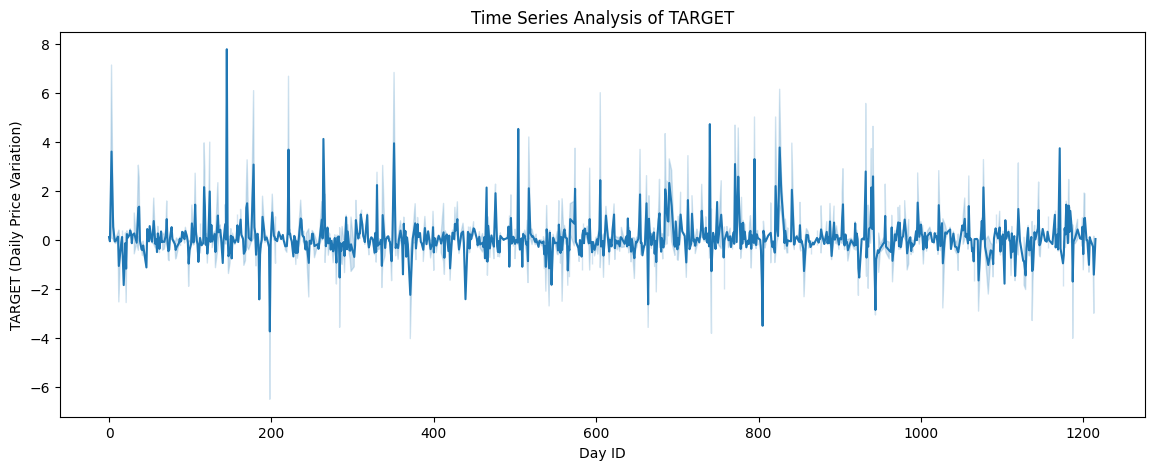

In [4]:
# Plotting the time series of the TARGET variable
plt.figure(figsize=(14, 5))
sns.lineplot(x='DAY_ID', y='TARGET', data=train_data)
plt.title('Time Series Analysis of TARGET')
plt.xlabel('Day ID')
plt.ylabel('TARGET (Daily Price Variation)')
plt.show()

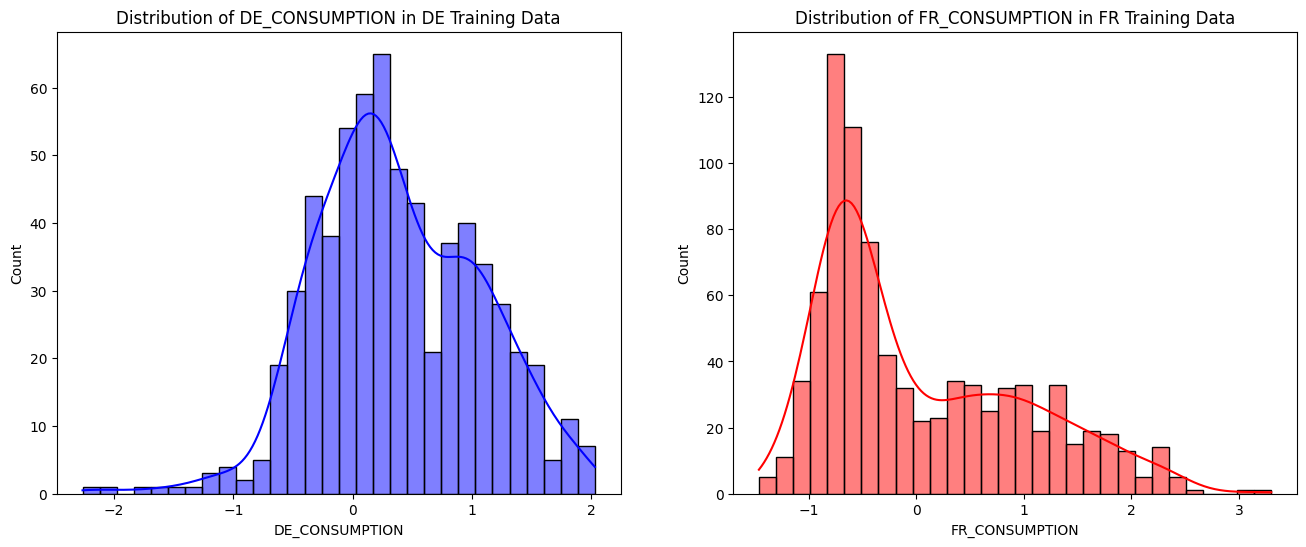

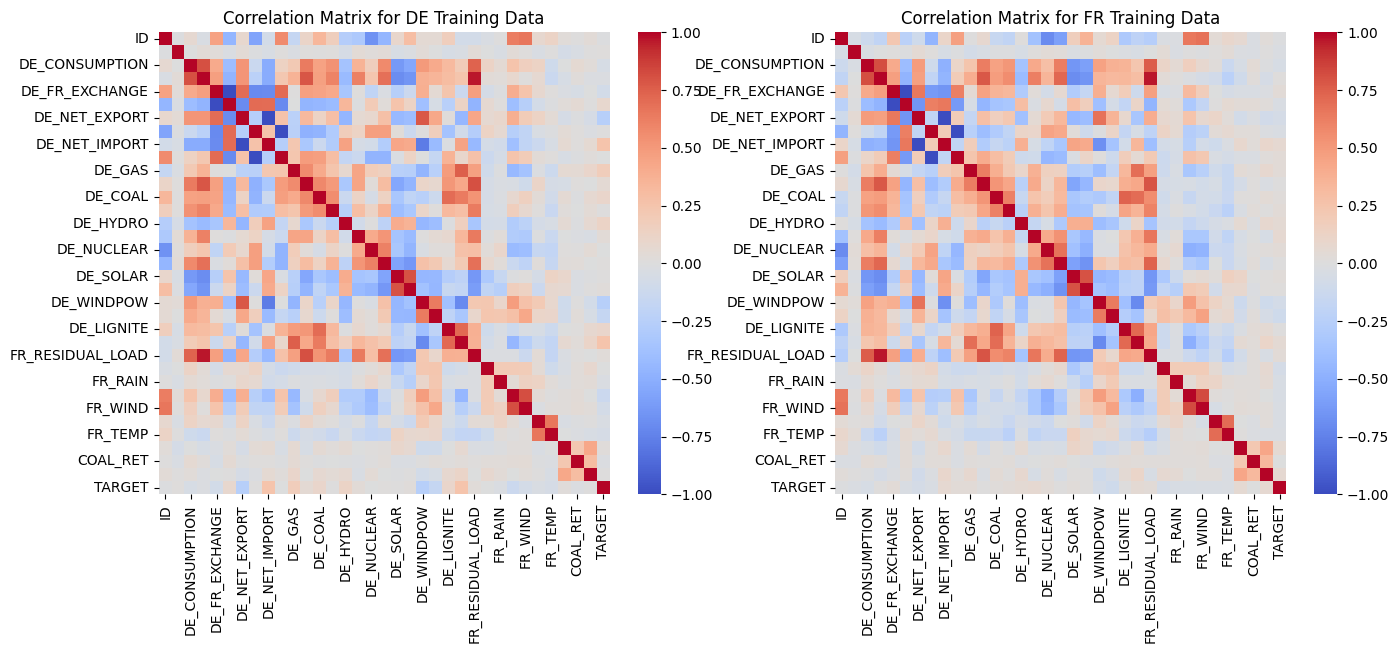

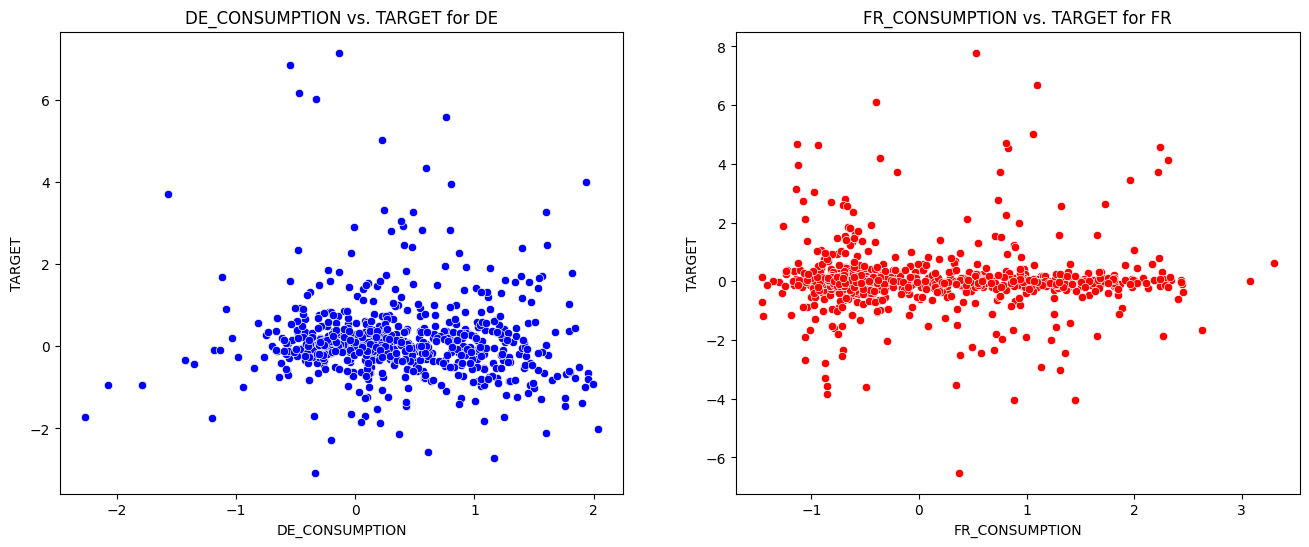

In [5]:
# Split the data based on country
de_train_data = train_data[train_data['COUNTRY'] == 'DE']
fr_train_data = train_data[train_data['COUNTRY'] == 'FR']


# Distribution plots for DE and FR consumption
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(de_train_data['DE_CONSUMPTION'], bins=30, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution of DE_CONSUMPTION in DE Training Data')
sns.histplot(fr_train_data['FR_CONSUMPTION'], bins=30, kde=True, color='red', ax=axes[1])
axes[1].set_title('Distribution of FR_CONSUMPTION in FR Training Data')
plt.show()

de_numeric_columns = de_train_data.select_dtypes(include=[np.number]).columns
fr_numeric_columns = fr_train_data.select_dtypes(include=[np.number]).columns
# Correlation matrices for DE and FR
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(de_train_data[de_numeric_columns].corr(), cmap='coolwarm', ax=axes[0])
axes[0].set_title('Correlation Matrix for DE Training Data')
sns.heatmap(fr_train_data[fr_numeric_columns].corr(), cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix for FR Training Data')
plt.show()

# Scatter plots for target variable vs. consumption for DE and FR
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=de_train_data, x='DE_CONSUMPTION', y='TARGET', color='blue', ax=axes[0])
axes[0].set_title('DE_CONSUMPTION vs. TARGET for DE')
axes[0].set_xlabel('DE_CONSUMPTION')
axes[0].set_ylabel('TARGET')
sns.scatterplot(data=fr_train_data, x='FR_CONSUMPTION', y='TARGET', color='red', ax=axes[1])
axes[1].set_title('FR_CONSUMPTION vs. TARGET for FR')
axes[1].set_xlabel('FR_CONSUMPTION')
axes[1].set_ylabel('TARGET')
plt.show()

/var/folders/yh/d5yswnh530g0gnwpdp998k9c0000gn/T/ipykernel_1549/2204544107.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_de.index, y=correlation_de.values, palette=[color_negative_red(val) for val in correlation_de.values])
/var/folders/yh/d5yswnh530g0gnwpdp998k9c0000gn/T/ipykernel_1549/2204544107.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_fr.index, y=correlation_fr.values, palette=[color_negative_red(val) for val in correlation_fr.values])


<Figure size 1000x800 with 0 Axes>

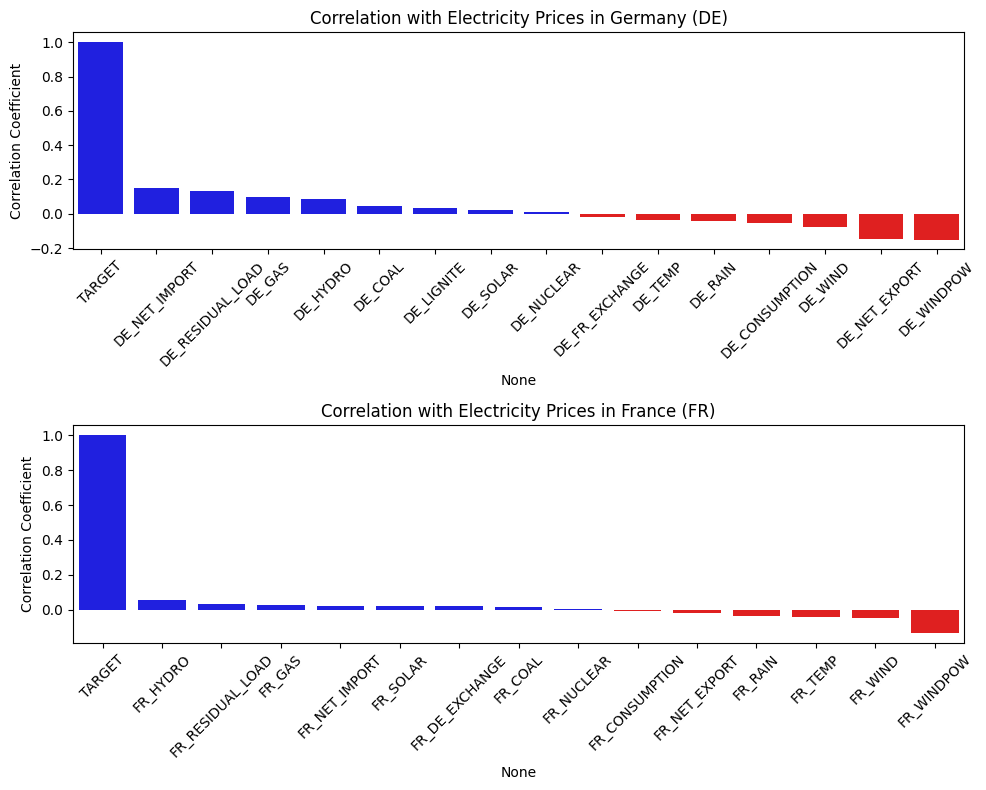

In [6]:
# Calculate correlations with the price for each country's energy variables
de_columns = [col for col in train_data.columns if col.startswith('DE_')]
fr_columns = [col for col in train_data.columns if col.startswith('FR_')]

# Calculate correlation matrix and filter for the target column
correlation_de = train_data[de_columns + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)
correlation_fr = train_data[fr_columns + ['TARGET']].corr()['TARGET'].sort_values(ascending=False)

# Step 3: Visualization
# Visualize the correlations for better comparison

plt.figure(figsize=(10, 8))

# Function to apply color based on the value
def color_negative_red(value):
    if value < 0:
        return 'red'
    else:
        return 'blue'

# Plot for Germany
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.barplot(x=correlation_de.index, y=correlation_de.values, palette=[color_negative_red(val) for val in correlation_de.values])
plt.title('Correlation with Electricity Prices in Germany (DE)')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')

# Plot for France
plt.subplot(2, 1, 2)
sns.barplot(x=correlation_fr.index, y=correlation_fr.values, palette=[color_negative_red(val) for val in correlation_fr.values])
plt.title('Correlation with Electricity Prices in France (FR)')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')

plt.tight_layout()
plt.show()


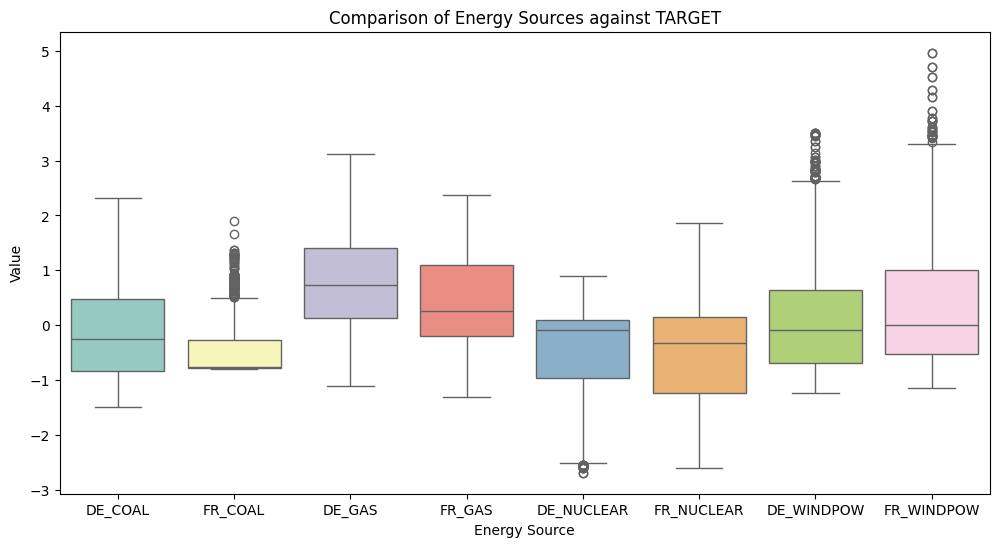

In [7]:
# Create a new DataFrame with only the energy sources and the target variable
energy_data = train_data[['DE_COAL', 'FR_COAL', 'DE_GAS', 'FR_GAS', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_WINDPOW', 'FR_WINDPOW', 'TARGET']]

# Melting the DataFrame to make it suitable for sns.boxplot
energy_melted = energy_data.melt(id_vars='TARGET', var_name='Energy Source', value_name='Value')

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Energy Source', y='Value', hue='Energy Source', data=energy_melted, palette="Set3")
plt.title('Comparison of Energy Sources against TARGET')
plt.show()


**Spread and Central Tendency:** The median (central line in each box), the interquartile range (the height of each box), and the range (whiskers) vary across different energy sources. For example, DE_COAL and FR_COAL have similar medians near 0, but FR_COAL shows a larger interquartile range, indicating more variability in France's coal data.

**Outliers:** The points above and below the whiskers indicate outliers. There are energy sources with a significant number of outliers, such as FR_WINDPOW, which could suggest volatility or occasional extreme values in France's wind power data.

**Symmetry and Skewness:** The symmetry of the boxes around the median line indicates skewness in the data. For instance, FR_GAS appears quite symmetrical, suggesting a fairly even distribution of data around the median, while DE_NUCLEAR shows a right skew with a tail extending towards higher values.

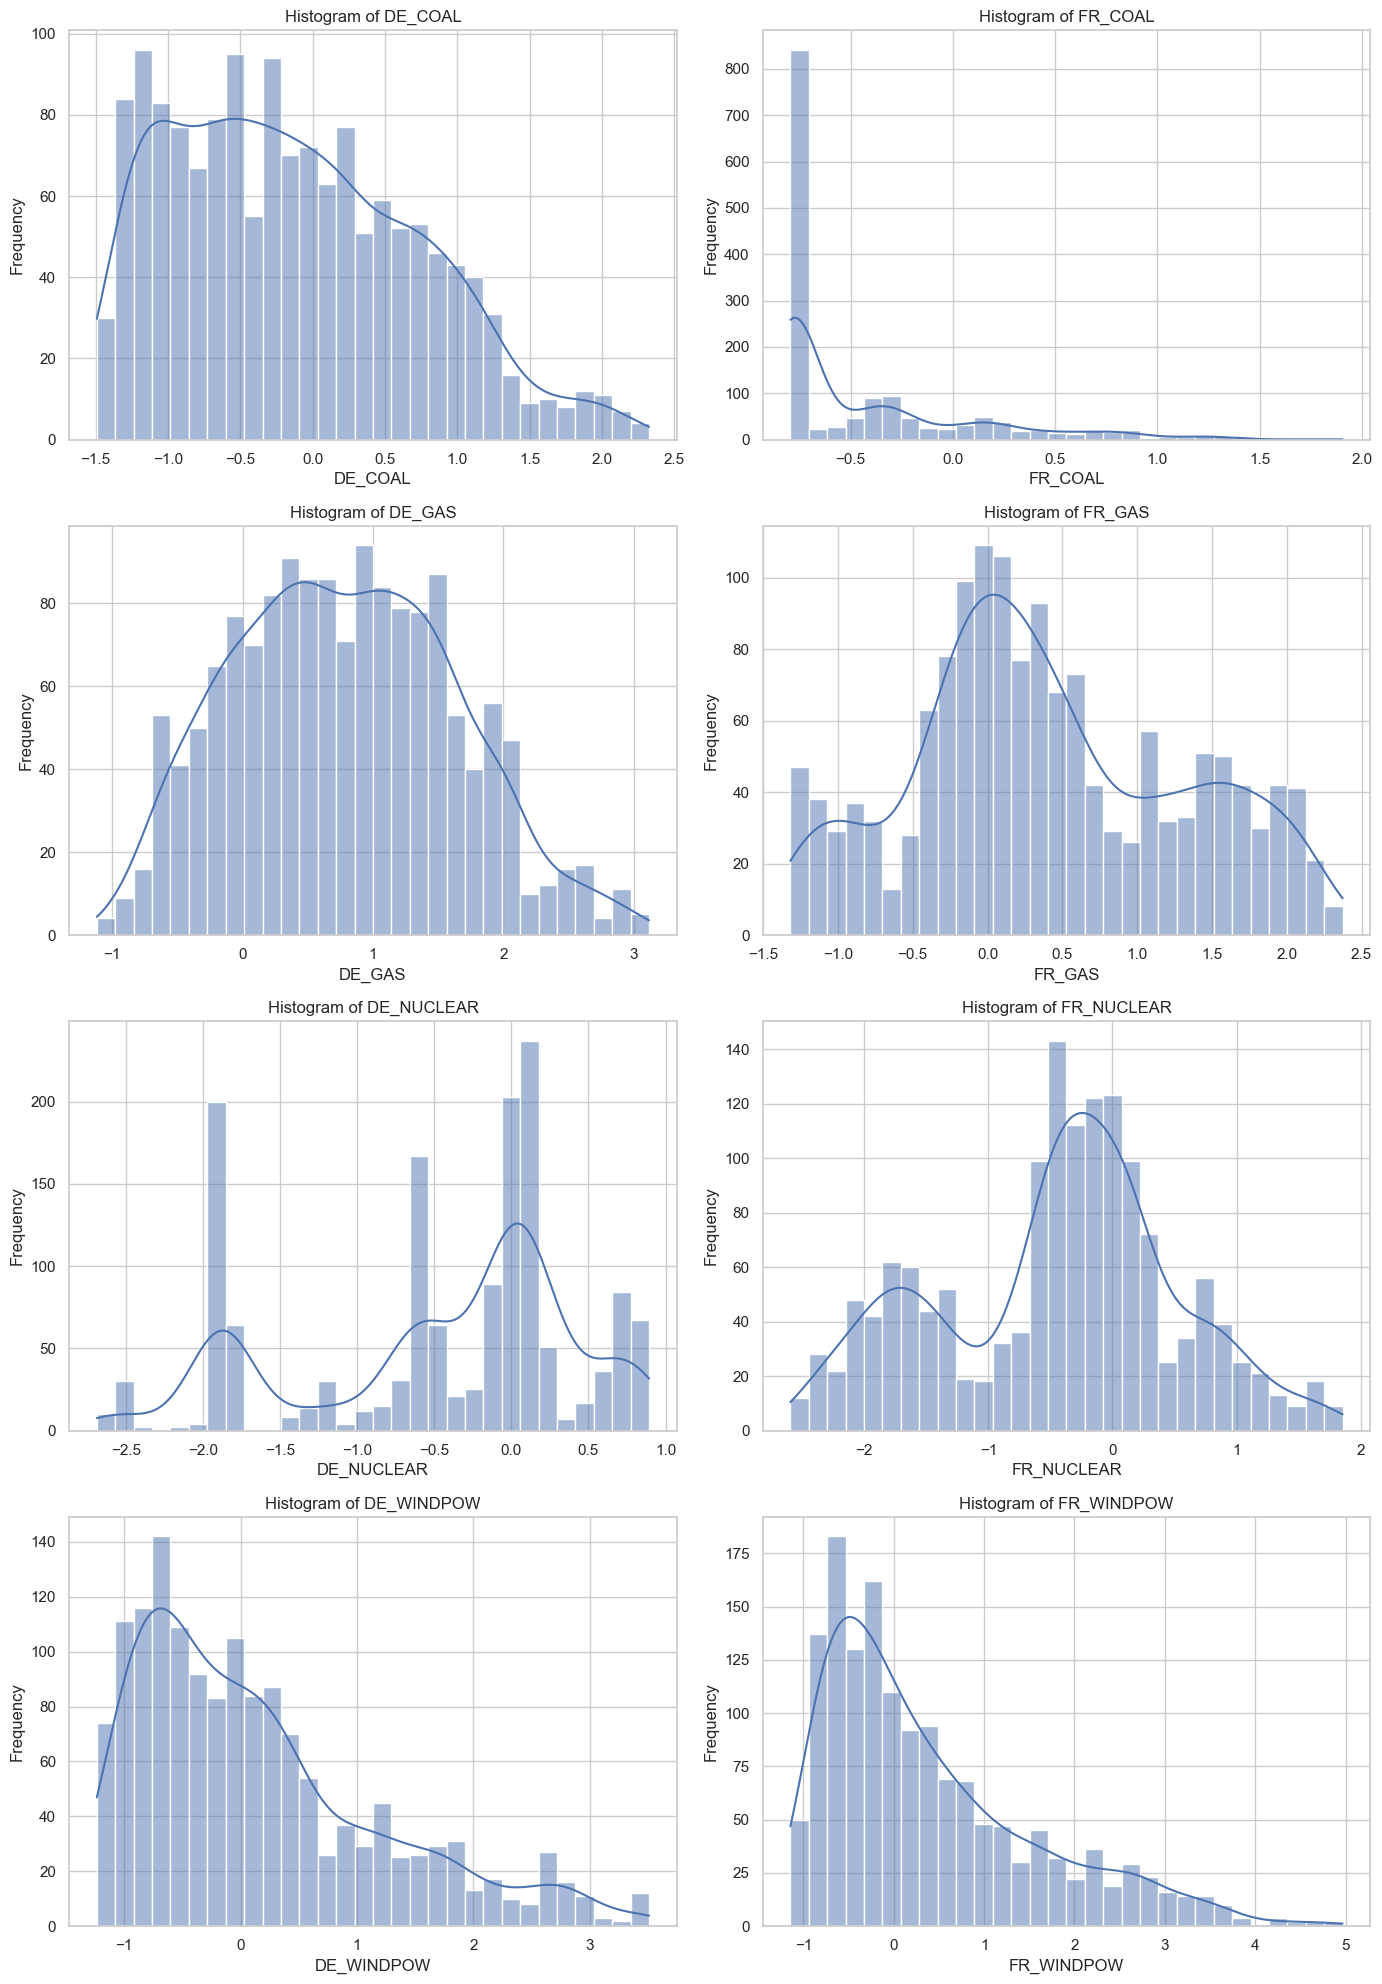

In [ ]:
# Define the energy sources to plot
energy_sources = ['DE_COAL', 'FR_COAL', 'DE_GAS', 'FR_GAS', 'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_WINDPOW', 'FR_WINDPOW']

# Define the number of rows needed for subplots based on the number of energy sources
n_rows = len(energy_sources) // 2

# Create a large figure to accommodate all subplots
plt.figure(figsize=(14, n_rows * 5))

# Plot histograms for each energy source
for i, source in enumerate(energy_sources, 1):
    plt.subplot(n_rows, 2, i)
    sns.histplot(train_data[source], bins=30, kde=True)
    plt.title(f'Histogram of {source}')
    plt.xlabel(source)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

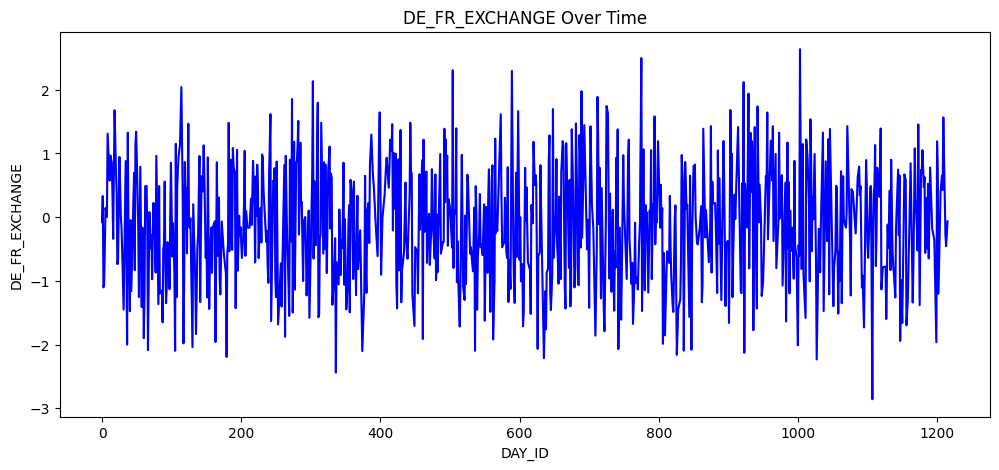

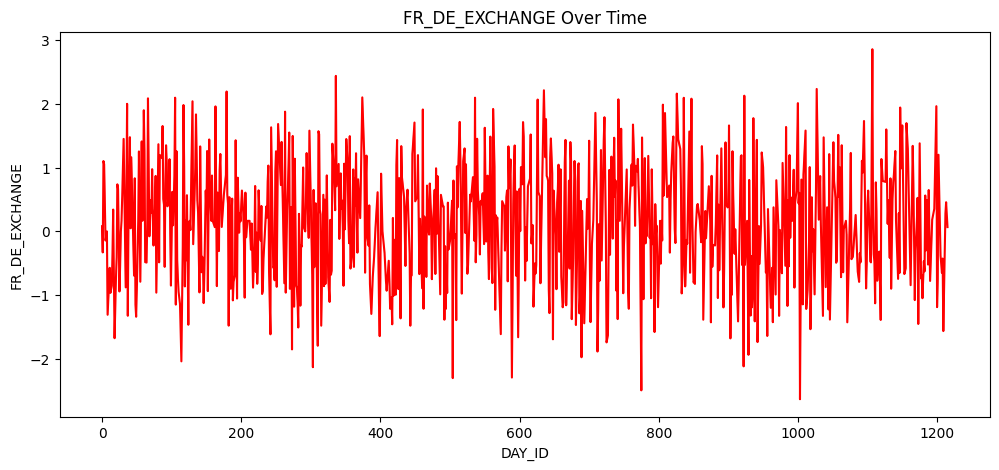

In [ ]:
# Trend of DE_FR_EXCHANGE over time using a line plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='DAY_ID', y='DE_FR_EXCHANGE', data=train_data, color='blue')
plt.title('DE_FR_EXCHANGE Over Time')
plt.xlabel('DAY_ID')
plt.ylabel('DE_FR_EXCHANGE')
plt.show()

# Trend of FR_DE_EXCHANGE over time using a line plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='DAY_ID', y='FR_DE_EXCHANGE', data=train_data, color='red')
plt.title('FR_DE_EXCHANGE Over Time')
plt.xlabel('DAY_ID')
plt.ylabel('FR_DE_EXCHANGE')
plt.show()


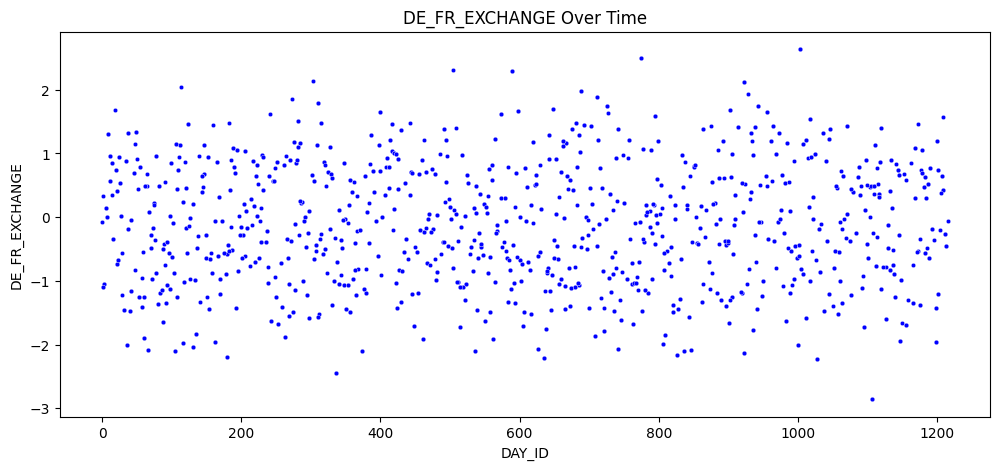

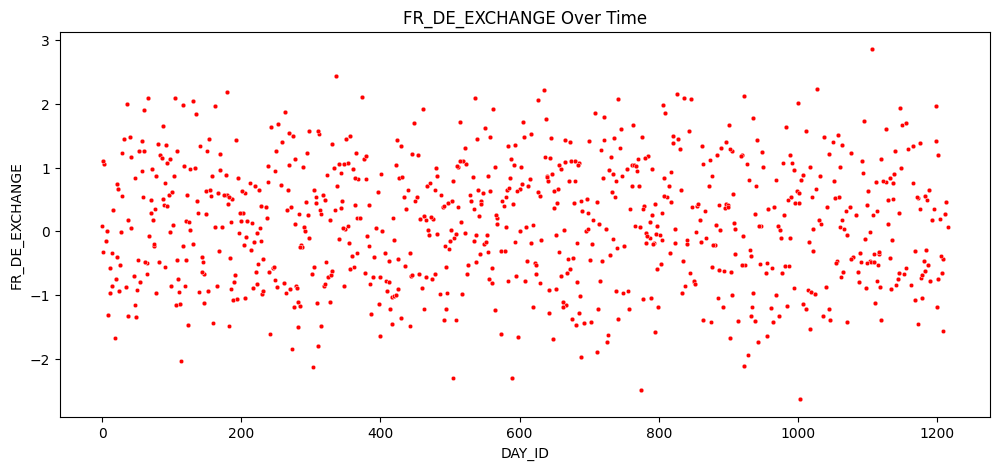

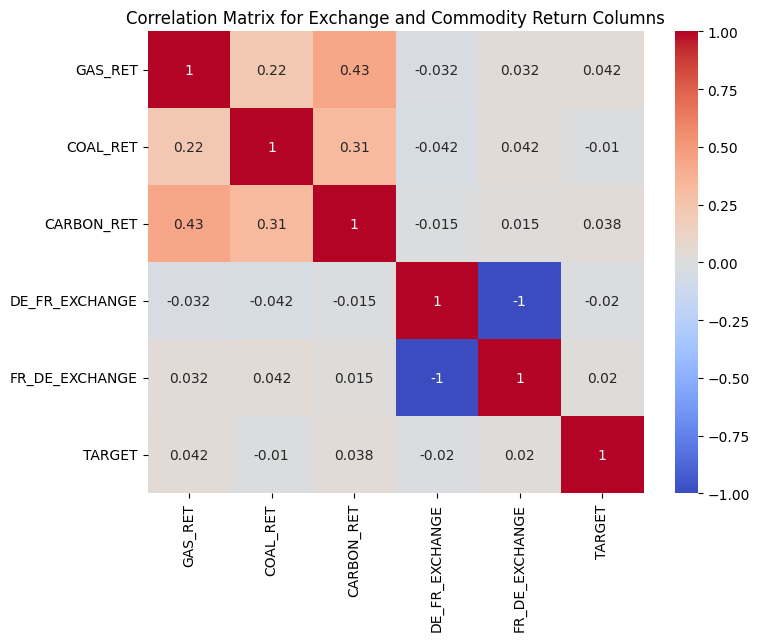

In [9]:
# Trend of DE_FR_EXCHANGE over time
plt.figure(figsize=(12, 5))
sns.scatterplot(x=train_data['DAY_ID'], y=train_data['DE_FR_EXCHANGE'], color='blue', s=10)  # s is the size of points
plt.title('DE_FR_EXCHANGE Over Time')
plt.xlabel('DAY_ID')
plt.ylabel('DE_FR_EXCHANGE')
plt.show()

# Trend of FR_DE_EXCHANGE over time
plt.figure(figsize=(12, 5))
sns.scatterplot(x=train_data['DAY_ID'], y=train_data['FR_DE_EXCHANGE'], color='red', s=10)
plt.title('FR_DE_EXCHANGE Over Time')
plt.xlabel('DAY_ID')
plt.ylabel('FR_DE_EXCHANGE')
plt.show()

# Correlation of exchange columns and common columns with TARGET
common_columns = ['GAS_RET', 'COAL_RET', 'CARBON_RET', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'TARGET']
correlation = train_data[common_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Exchange and Commodity Return Columns')
plt.show()
